In [38]:
import pandas as pd
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler

In [39]:
path = "/Users/phuonglh/vlp/vcb/dat/HOSE_2008_2022_vnstock.csv"

In [40]:
df = pd.read_csv(path, parse_dates=["TradingDate"])

In [41]:
df

,Id,Open,High,Low,Close,Volume,TradingDate,Stock
0,0,8552.0,8552.0,8552.0,8552.0,5380.0,2009-09-24,AAM
1,1,8965.0,8965.0,8965.0,8965.0,12090.0,2009-09-25,AAM
2,2,9377.0,9377.0,9377.0,9377.0,9150.0,2009-09-28,AAM
3,3,9846.0,9846.0,9846.0,9846.0,11530.0,2009-09-29,AAM
4,4,10315.0,10315.0,10315.0,10315.0,29680.0,2009-09-30,AAM
...,...,...,...,...,...,...,...,...
828791,3736,7430.0,7440.0,7150.0,7200.0,98212.0,2022-12-26,VTO
828792,3737,7160.0,7300.0,7150.0,7200.0,86405.0,2022-12-27,VTO
828793,3738,7200.0,7460.0,7200.0,7420.0,127829.0,2022-12-28,VTO
828794,3739,7410.0,7430.0,7320.0,7420.0,36470.0,2022-12-29,VTO


In [42]:
fpt = df[df['Stock'] == 'FPT'].drop(labels='Id', axis=1)

In [43]:
fpt

,Open,High,Low,Close,Volume,TradingDate,Stock
229087,13142.0,13201.0,13023.0,13023.0,113410.0,2008-01-02,FPT
229088,12845.0,12904.0,12785.0,12785.0,211160.0,2008-01-03,FPT
229089,12607.0,12666.0,12547.0,12607.0,180890.0,2008-01-04,FPT
229090,12488.0,12488.0,12190.0,12250.0,232200.0,2008-01-07,FPT
229091,12428.0,12428.0,12369.0,12369.0,214660.0,2008-01-08,FPT
...,...,...,...,...,...,...,...
232823,77700.0,78100.0,76400.0,76400.0,833640.0,2022-12-26,FPT
232824,76400.0,77500.0,76000.0,76500.0,806989.0,2022-12-27,FPT
232825,77000.0,77000.0,76000.0,76700.0,590282.0,2022-12-28,FPT
232826,76500.0,77000.0,76200.0,76200.0,656647.0,2022-12-29,FPT


In [44]:
train, valid, test = TSDataset.from_pandas(fpt, dt_col="TradingDate", target_col="Close", extra_feature_col=['Open', 'High', 'Low', 'Close', 'Volume'], with_split=True, val_ratio=0, test_ratio=0.2)

In [45]:
train.df

,Open,High,Low,Close,Volume,TradingDate,Stock,id
229087,13142.0,13201.0,13023.0,13023.0,113410.0,2008-01-02,FPT,0
229088,12845.0,12904.0,12785.0,12785.0,211160.0,2008-01-03,FPT,0
229089,12607.0,12666.0,12547.0,12607.0,180890.0,2008-01-04,FPT,0
229090,12488.0,12488.0,12190.0,12250.0,232200.0,2008-01-07,FPT,0
229091,12428.0,12428.0,12369.0,12369.0,214660.0,2008-01-08,FPT,0
...,...,...,...,...,...,...,...,...
232075,33584.0,34223.0,33467.0,34049.0,2881060.0,2019-12-30,FPT,0
232076,34049.0,34107.0,33700.0,33874.0,689030.0,2019-12-31,FPT,0
232077,33874.0,34281.0,33700.0,34049.0,896720.0,2020-01-02,FPT,0
232078,34223.0,34339.0,33351.0,33467.0,2047880.0,2020-01-03,FPT,0


In [46]:
test.df

,Open,High,Low,Close,Volume,TradingDate,Stock,id
232080,33293.0,33758.0,33119.0,33758.0,837240.0,2020-01-07,FPT,0
232081,33409.0,33526.0,33003.0,33003.0,1814290.0,2020-01-08,FPT,0
232082,33293.0,33526.0,33177.0,33467.0,967050.0,2020-01-09,FPT,0
232083,33409.0,33584.0,33177.0,33409.0,1018650.0,2020-01-10,FPT,0
232084,33351.0,33467.0,33119.0,33177.0,786760.0,2020-01-13,FPT,0
...,...,...,...,...,...,...,...,...
232823,77700.0,78100.0,76400.0,76400.0,833640.0,2022-12-26,FPT,0
232824,76400.0,77500.0,76000.0,76500.0,806989.0,2022-12-27,FPT,0
232825,77000.0,77000.0,76000.0,76700.0,590282.0,2022-12-28,FPT,0
232826,76500.0,77000.0,76200.0,76200.0,656647.0,2022-12-29,FPT,0


In [47]:
lookback, horizon = 15, 10

In [48]:
scaler = StandardScaler()
for data in [train, test]:
    data.deduplicate() \
        .impute() \
        .gen_dt_feature() \
        .scale(scaler, fit=(data is train)) \
        .roll(lookback=lookback, horizon=horizon)

In [49]:
train.df

,Open,High,Low,Close,Volume,TradingDate,Stock,id,DAY,DAYOFYEAR,WEEKDAY,WEEKOFYEAR,MONTH,YEAR,IS_WEEKEND
0,0.054930,0.044499,0.055761,0.039085,-0.770613,2008-01-02,FPT,0,-1.599532,-1.773567,-0.009951,-1.751992,-1.655639,-1.596161,0.0
1,0.013642,0.003636,0.022371,0.006000,-0.631388,2008-01-03,FPT,0,-1.484034,-1.764003,0.699207,-1.751992,-1.655639,-1.596161,0.0
2,-0.019444,-0.029109,-0.011020,-0.018745,-0.674501,2008-01-04,FPT,0,-1.368536,-1.754439,1.408366,-1.751992,-1.655639,-1.596161,0.0
3,-0.035986,-0.053600,-0.061105,-0.068372,-0.601420,2008-01-07,FPT,0,-1.022041,-1.725748,-1.428269,-1.685084,-1.655639,-1.596161,0.0
4,-0.044327,-0.061855,-0.035992,-0.051830,-0.626403,2008-01-08,FPT,0,-0.906543,-1.716184,-0.719110,-1.685084,-1.655639,-1.596161,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,2.896680,2.936811,2.923963,2.961986,3.171359,2019-12-30,FPT,0,1.634417,1.688594,-1.428269,-1.751992,1.561157,1.587362,0.0
2989,2.961322,2.920851,2.956652,2.937658,0.049244,2019-12-31,FPT,0,1.749915,1.698158,-0.719110,-1.751992,1.561157,1.587362,0.0
2990,2.936994,2.944791,2.956652,2.961986,0.345058,2020-01-02,FPT,0,-1.599532,-1.773567,0.699207,-1.751992,-1.655639,1.876773,0.0
2991,2.985510,2.952771,2.907689,2.881080,1.984658,2020-01-03,FPT,0,-1.484034,-1.764003,1.408366,-1.751992,-1.655639,1.876773,0.0


In [50]:
X, y = train.to_numpy()

In [51]:
X.shape, y.shape

((2969, 15, 13), (2969, 10, 1))

In [52]:
from bigdl.chronos.forecaster.tcn_forecaster import TCNForecaster

In [53]:
tcn = TCNForecaster(past_seq_len=lookback, future_seq_len=horizon, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], seed=1)

INFO:pytorch_lightning.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.seed:Global seed set to 1


In [54]:
tcn.fit((X, y), batch_size=32, epochs=10)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | NormalizeTSModel | 5.2 K 
1 | loss  | MSELoss          | 0     
-------------------------------------------
5.2 K     Trainable params
0         Non-trainable params
5.2 K     Total params
0.021     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [55]:
X_test, y_test = test.to_numpy()

In [56]:
tcn.evaluate((X_test, y_test))

[array([[0.03000116],
        [0.06030601],
        [0.08588194],
        [0.11126943],
        [0.13459398],
        [0.15238857],
        [0.1751263 ],
        [0.21073176],
        [0.24115437],
        [0.27101347]])]

In [57]:
prediction = tcn.predict(X_test)

In [58]:
p, t = test.unscale_numpy(prediction), test.unscale_numpy(y_test)

In [59]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Close Price')

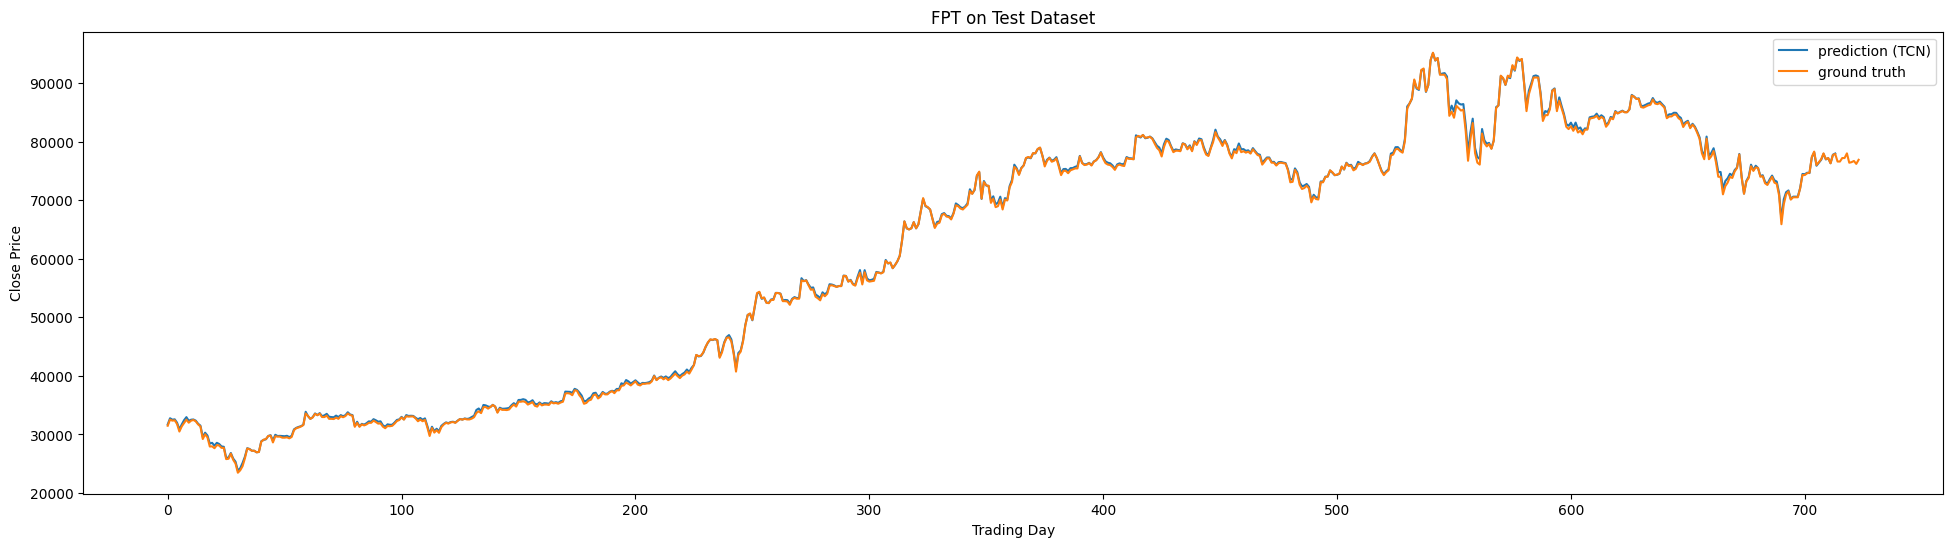

In [81]:
plt.figure(figsize=(24,6))
plt.plot(p[:,:,0][:,-1][horizon:]) # shift horizon time steps
plt.plot(t[:,:,0][:,-1]) 
plt.legend(["prediction (TCN)", "ground truth"])
plt.title('FPT on Test Dataset')
plt.xlabel('Trading Day')
plt.ylabel('Close Price')